# TS7: Estimación espectral. Ventanas en acción!

En esta tarea continuaremos con el capítulo 14 de Holton. DSP Principles and App.

Para ello, realizaremos el punto 3.a del TP2.

3) Genere la siguiente señal

\begin{equation}
x(k)=a_⋅sen(\Omega_1⋅k)
\end{equation}

siendo

+ $a_0=2$
+ $\Omega_1=\Omega_0 + f_r⋅\frac{2\pi}{N}$
+ $\Omega_0=\frac{\pi}{2}$

y la variable aleatoria definida por la siguiente distribución de probabilidad

$f_r\sim\mho(−2,2)$

Considere 200 realizaciones (muestras tomadas de $f_r$) para cada ventana analizada en la TS6. Se pide entonces:

3) a) Grafique los histogramas de

$\lvert X_i^w(\Omega)\rvert$


siendo

$\lvert X_i^w(\Omega)\rvert=\lvert F\{x(k)⋅w_i(k)\}\rvert$

para la i-ésima ventana de las 5 utilizadas en la TS6. El sesgo y la varianza se definen para este caso como:

$\color{blue}{\text{Grafique los 5 histogramas juntos, o cuide que todos los gráficos tengan el mismo rango de valores en X para facilitar la comparación visual}}$

3.b) Calcule experimentalmente el sesgo y la varianza del siguiente estimador:

\begin{equation}
\hat{a_0}=\lvert X_i^w(\Omega)\rvert
\end{equation}

siendo

\begin{equation}
s_a=E\{\hat{a_0}\} − a_0
\end{equation}

\begin{equation}
v_a=var\{\hat{a_0}\}=E\{(\hat{a_0}−E\{\hat{a_0}\})^2\}
\end{equation}

y pueden aproximarse cuando consideramos los valores esperados como las medias muestrales

\begin{equation}
E{\hat{a_0}}=\hat{\mu_a}=\frac{1}{M}\sum_{j=0}^{M-1}\hat{a_j}
\end{equation}

\begin{equation}
s_a=\hat{\mu_a}−\hat{a_0}
\end{equation}

\begin{equation}
v_a=\frac{1}{M}\sum_{j=0}^{M-1}(\hat{a_j}−\hat{\mu_a})^2
\end{equation}

## Estimación de Amplitud

In [15]:
from pandas import DataFrame
from IPython.display import display, Javascript, HTML
df = DataFrame([['','']], columns=['$S_a$', '$V_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())

,$S_a$,$V_a$
Rectangular,,
Bartlett,,
Hann,,
Blackman,,
Flat-top,,


## Resolucion:

<IPython.core.display.Javascript object>

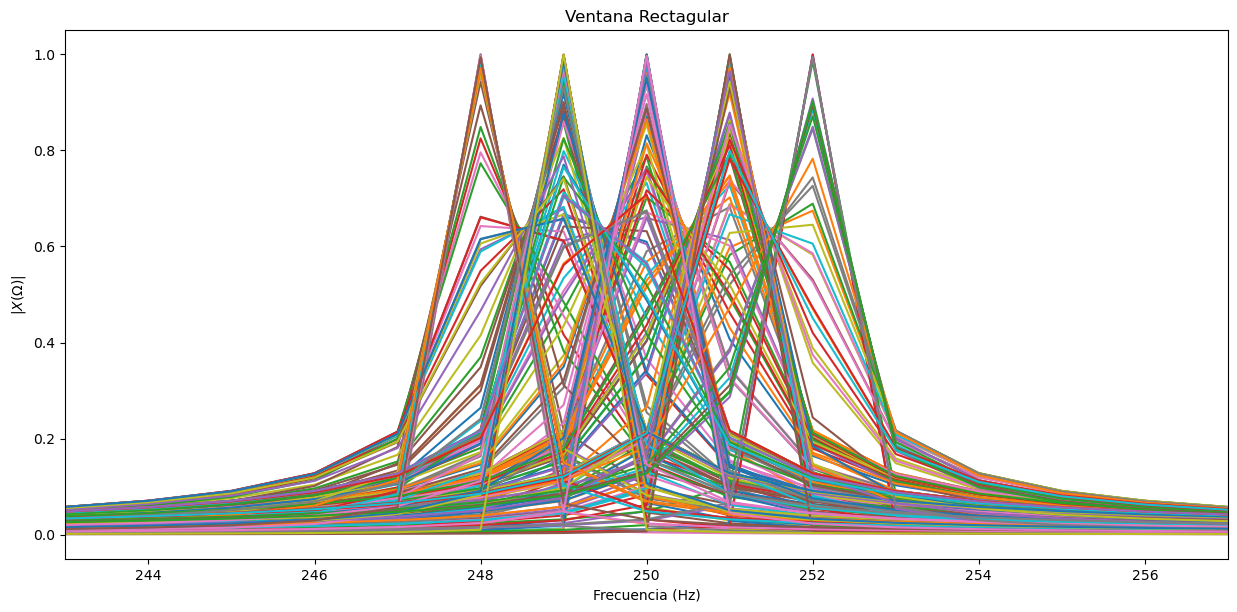

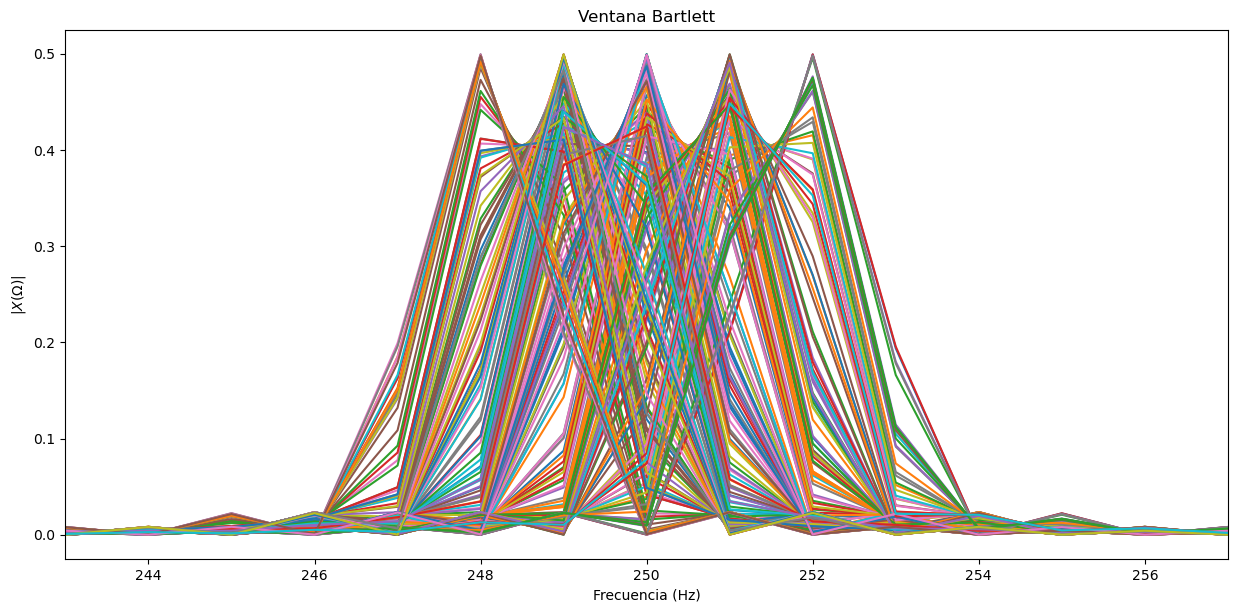

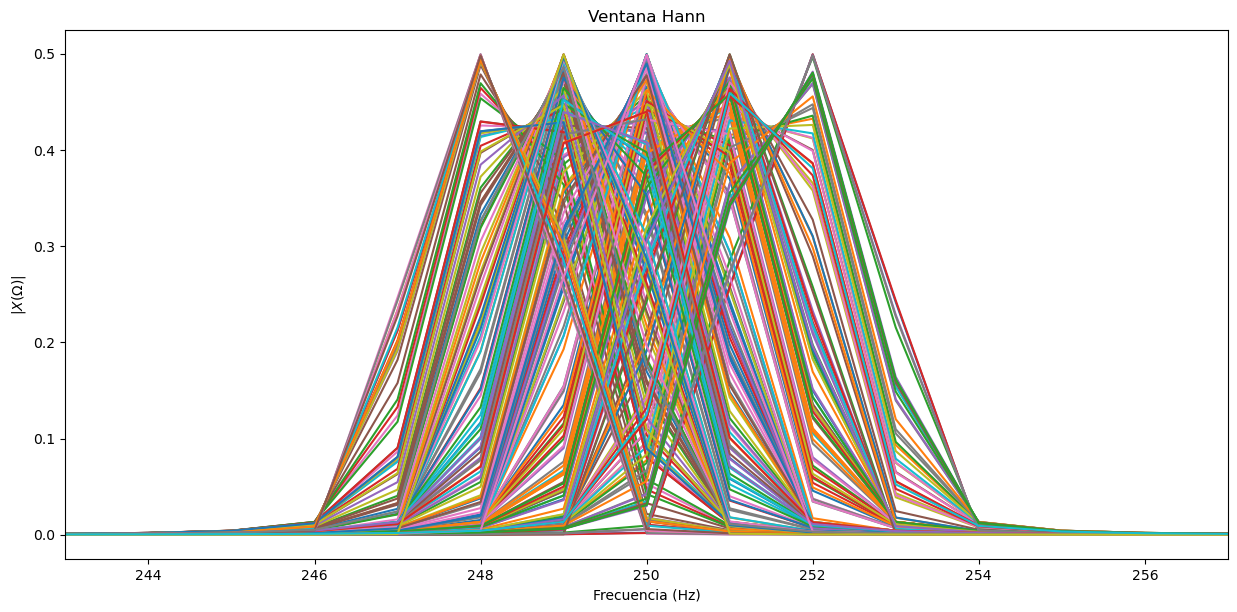

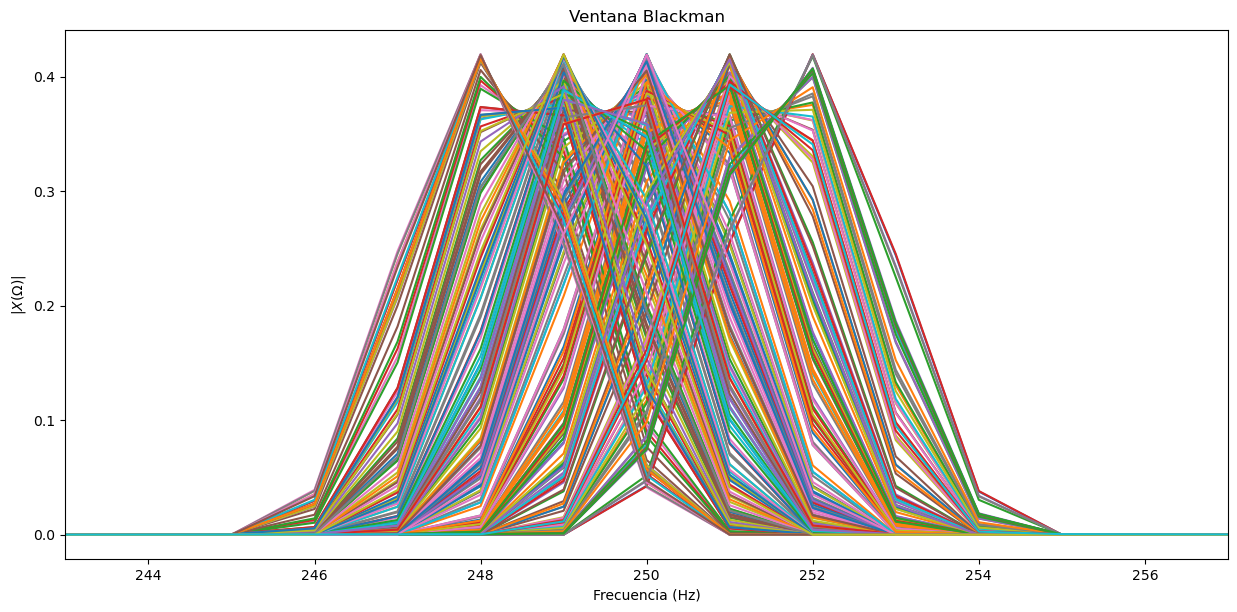

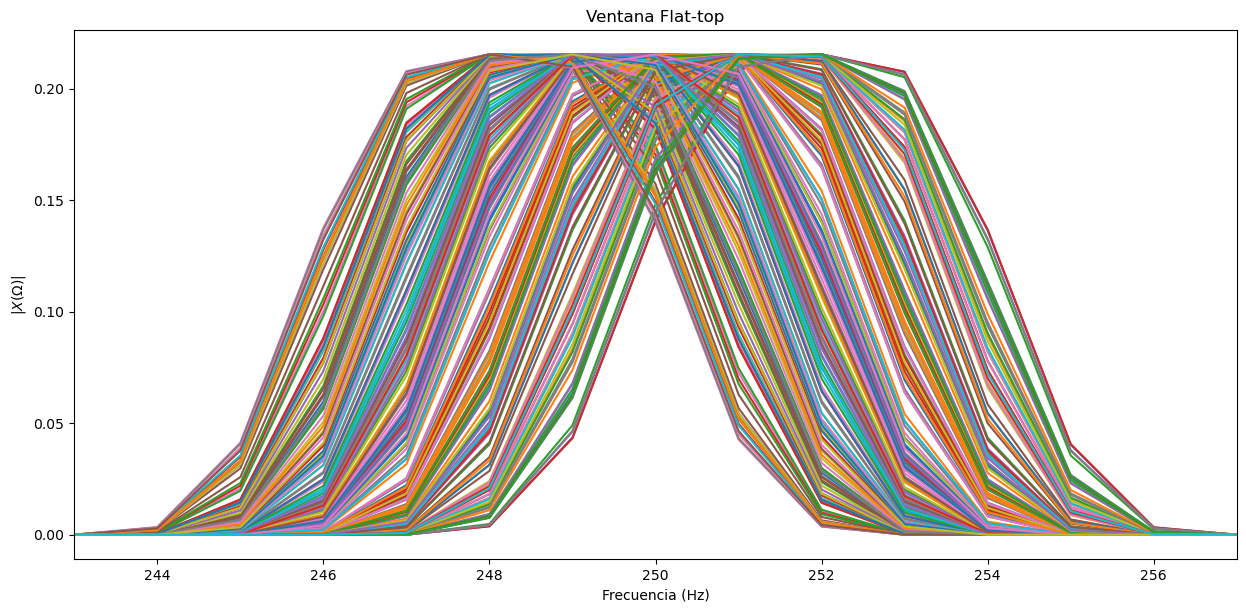

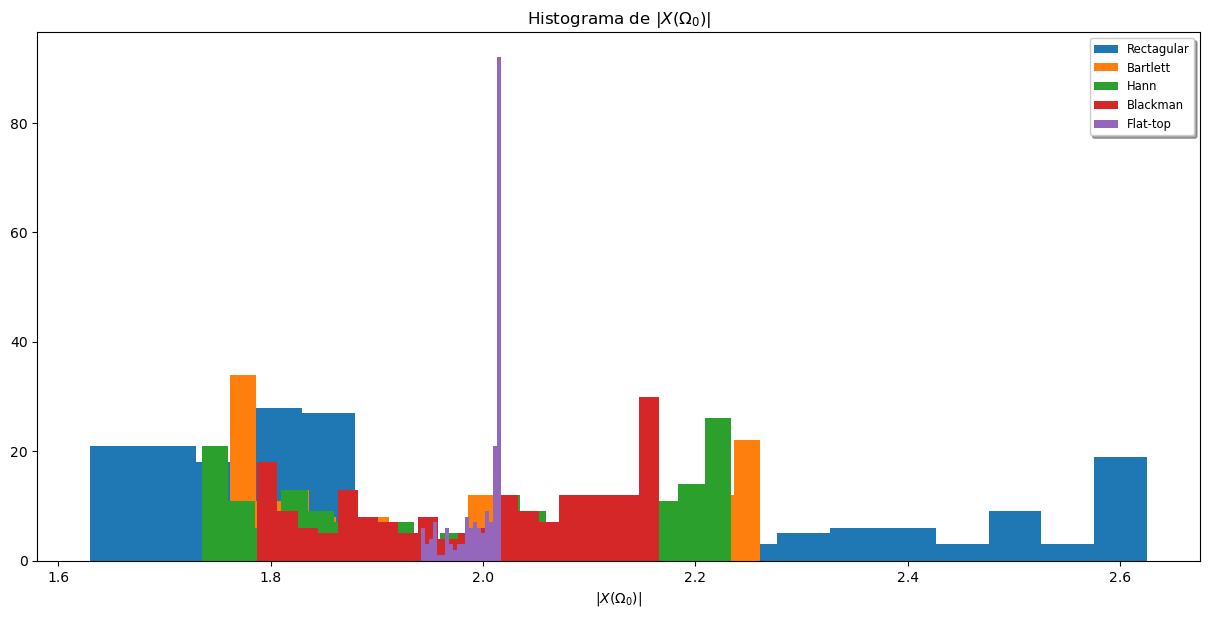

In [8]:
import tools_psd as tp
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sg

def load_ipython_extension():
    disable_js = """
    IPython.OutputArea.prototype._should_scroll = function(lines) {
        return false;
    }
    """

    display(Javascript(disable_js))
    
N=1000
fs = 1000
Npad = 10 * N
ts = 1/fs
pi=np.pi
a0 = 2
repeat = 200
tt = np.linspace(0, (N-1)*ts, N).flatten()

tus_resultados = []

ventanas = {1:sg.windows.boxcar, 2:tp.w_Bartlett, 3:tp.w_Hann, 4:tp.w_Blackman, 5:sg.flattop}
w_name = {1:'Rectagular', 2:'Bartlett', 3:'Hann', 4:'Blackman', 5:'Flat-top'}

fr = np.random.uniform(-2, 2, repeat)
omega1 = (pi/2 + fr*((2*pi)/N))*(fs/(2*pi))

plt.close('all')

for i in range(1, 6):
    x1 = a0*np.sin(2*pi*tt.reshape(N,1)*omega1.reshape(1,repeat))
    x1 = x1 * np.array(ventanas[i](N)).reshape(N,1)
    
    ff = np.fft.fftfreq(N, d=1/fs)
    fftx = np.fft.fft(x1, n = N, axis = 0) * (1/N)
    
    ff = ff[0:ff.size//2]
    fftx = fftx[0:ff.size]
    
    a0_ = np.abs(fftx[ff == 250,:]).flatten() 
    a0_ += 2 - np.mean(a0_) 
    
    plt.figure(i, figsize=(15, 7), dpi=100)
    plt.plot(ff, np.abs(fftx))
    plt.xlim(243, 257)
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("$|X(\Omega)|$")
    plt.title(f"Ventana {w_name[i]}")
    
    plt.figure(6, figsize=(15, 7), dpi=100)
    plt.hist(a0_, bins=20, label=f"{w_name[i]}")
    plt.title("Histograma de $|X(\Omega_0)|$")
    plt.xlabel("$|X(\Omega_0)|$")
    plt.legend(loc='upper right', shadow=True, fontsize='small')
    
    E = (1/repeat)*np.sum(a0_)
    sesgo = E - a0
    varianza = np.var(a0_)
    
    tus_resultados.append([f'{round(sesgo,4)}', f'{round(varianza,4)}'])

load_ipython_extension()

In [9]:
df = DataFrame(tus_resultados, columns=['$S_a$', '$V_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())

,$S_a$,$V_a$
Rectangular,0.0,0.1035
Bartlett,0.0,0.0311
Hann,0.0,0.0287
Blackman,0.0,0.0157
Flat-top,-0.0,0.0005
